In [50]:
import numpy as np
from utils import *
import random
from os import listdir

data=[]
for target in listdir("data/"):
    inp = cv2.imread(r"data\%s"%target)
    target=target.split('.png')[0]
    data.append([inp, target])
np.random.shuffle(data)

In [55]:
def show_image(img):
    import matplotlib.pyplot as plt
    plt.imshow(img, cmap='gray')
    plt.show()


def ocr(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image=cv2.copyMakeBorder(image,3,3,3,3,cv2.BORDER_CONSTANT,value=[250])
    show_image(image)

    image=cv2.filter2D(image, -1, np.ones((4, 4), np.float32) / 16)
    show_image(image)

    image = cv2.divide(image,
                cv2.morphologyEx(image, cv2.MORPH_DILATE,
                     cv2.getStructuringElement(cv2.MORPH_RECT, (8,8))),
                scale=255)
    show_image(image)

    image=cv2.filter2D(image, -1, np.ones((3, 3), np.float32) / 9)
    image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)[1]
    image=cv2.filter2D(image, -1, np.ones((4, 4), np.float32) / 16)
    image = cv2.threshold(image, 0, 255, cv2.THRESH_OTSU)[1]
    image=cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_CONSTANT,value=[255])
    # image=(image > 0.5).astype(int)*255
    show_image(image)

    captcha = pytesseract.image_to_string(image, config='--psm 8 -c tessedit_char_whitelist=ABCDEFGHIJKLMNPQRSTUVWYZ')
    denoised_captcha =  re.sub('[\W_]+', '', captcha).strip()
    return denoised_captcha


res=[]
np.random.shuffle(data)
for inp,target in data:
    output=ocr(inp)
    res.append(int(output==target))
res=np.array(res)
res.sum()/len(res)


0.3390909090909091

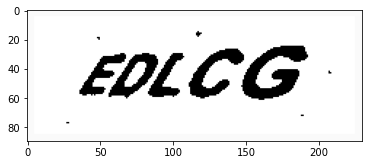

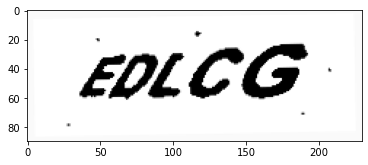

'CG'

In [207]:
from skimage import io, color, morphology, transform
img=image
show_image(image)

edges = morphology.dilation(morphology.skeletonize(image < 0.5), morphology.disk(1))

# Find the Hough lines
lines = transform.probabilistic_hough_line(edges, threshold=20, line_length=20, line_gap=10)

# Find the intersection point of the Hough lines
intersections = []
for i, line1 in enumerate(lines[:-1]):
    for line2 in lines[i+1:]:
        intersection = np.cross(line1, line2).astype('float64')
        if intersection[-1] != 0:
            intersection /= intersection[-1]
            intersections.append(intersection)
vanishing_point = np.mean(intersections, axis=0)

# Calculate the rotation angle
angle = np.arctan2(vanishing_point[1], vanishing_point[0])

w, h = image.shape

# Calculate the shift required to straighten the image
if angle < -45:
    angle += 90
    w, h = h, w
shift_x = int(w/2)
shift_y = int(h/2)

# Create a new image with the same dimensions as the original
new_img = np.zeros_like(img)

# Shift the pixels to straighten the image
rows, cols = img.shape
M = np.float32([[1, 0, -shift_x], [0, 1, -shift_y]])
shifted = cv2.warpAffine(img, M, (cols, rows), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

# Rotate the image to align the text
# o = transform.rotate(image, np.degrees(angle), resize=True, order=3, mode='edge')
show_image(o)

captcha = pytesseract.image_to_string(o, config='--psm 13 -c tessedit_char_whitelist=ABCDEFGHIJKLMNPQRSTUVWYZ')
denoised_captcha =  re.sub('[\W_]+', '', captcha).strip()
denoised_captcha